New names:
• `` -> `...1`
• `` -> `...2`


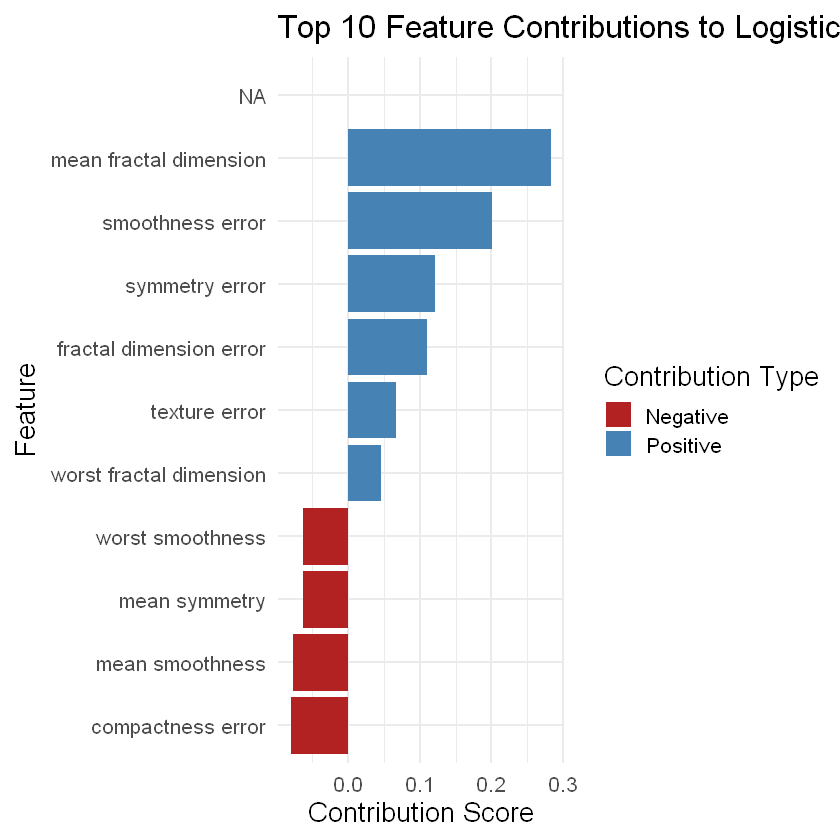

In [3]:
library(readxl)
library(ggplot2)
library(dplyr)

# 1. Read the Excel file without headers
file_path <- "C:/Users/jeffr/principal_component_analysis_project/model_outputs/top10_features.xlsx"

top10 <- read_excel(file_path, col_names = FALSE)

# 2. Assign proper column names
names(top10) <- c("Feature", "Contribution")

# 3. Ensure Contribution is numeric
top10$Contribution <- as.numeric(top10$Contribution)

# 4. Add a column indicating positive or negative contribution
top10 <- top10 %>%
  mutate(Sign = ifelse(Contribution >= 0, "Positive", "Negative"))

# 5. Horizontal bar chart
ggplot(top10, aes(x = reorder(Feature, Contribution),
                  y = Contribution,
                  fill = Sign)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = c("Positive" = "steelblue",
                               "Negative" = "firebrick")) +
  labs(
    title = "Top 10 Feature Contributions to Logistic Regresion Decision",
   x = "Feature",
   y = "Contribution Score",
   fill = "Contribution Type"
  ) +
  theme_minimal(base_size = 16)

ggsave(
  "C:/Users/jeffr/principal_component_analysis_project/model_outputs/top10_feature_contributions_R.png",
  width = 8,
  height = 6,
  dpi = 300
)
